In [1]:
#meta 7/21/2019
#Source: Great Courses - Mathematical Decision Making
#Professor Scott P. Stevens
#L8 Linear Programming and Optimal Network Flow

#based on L8_LinearProgramming.ipynb

#in L8_LinearProgramming.ipynb 7/14/2019 Explore an Application: Limited Resource Constraint
#      take 1) Plot 3D Limited
#      pre-compute limitations into optimal possibilites matrix
#      take 2) Plot 3D Unlimited (7/21/2019 )
#      Graph all together:
#      1) Unlimited Hours 2) Limited Work Hours and 3) Unlimited Revenues
#      Helps to visualize best Hours and Revenues with limited resource constraint

#here 7/21/2019 Visualize 3D Surfaces
#      Graph all together:
#      1) Unlimited Hours 2) Limited Work Hours and 3) Unlimited Revenues
#      Helps to visualize best Hours and Revenues with limited resource constraint

In [2]:
#helpful resources
##src https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
##src https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725
##meshgrid and more
##src https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy/36014586#36014586
"""
The reason that you need to use meshgrid is that your x and y coordinates are only 1D arrays initially and 
plot_surface expects X and Y to be 2D arrays. 
What meshgrid does is it creates 2D arrays from the two inputs with every permutation of the two.
"""

'\nThe reason that you need to use meshgrid is that your x and y coordinates are only 1D arrays initially and \nplot_surface expects X and Y to be 2D arrays. \nWhat meshgrid does is it creates 2D arrays from the two inputs with every permutation of the two.\n'

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d #to plot in 3D

A linear program is an optimization model. 

## Linear Programs: Geometric
In multiple regression, we can talk about a linear function of more than one variable. If we have two inputs, we can visualize this as a tabletop in which every position on the table is represented by a pair of x and y coordinates. A function of these two variables is represented by a surface hovering over that tabletop.

## Linear Programs: Algebraic
i.e. 2x + 3y + 4

## 1. Application: a limited resource constraint. 
Number of units use <= number of units available.

Suppose that during a 40-hour workweek, a building inspector can inspect either 80 houses or 10 farms.  
What math represents the number of hours the inspector spends inspecting this week if he or she inspects H houses and F farms?

The problem implies that each farm takes the same amount of time and each house takes the same amount of time. That makes the expression linear. 

1.  Find the constant term    
If we set both H and F equal to zero, the inspector doesn’t inspect anything, so he or she spends no time inspecting. That’s how we find the contstant term: it's zero.

2.  Coefficients  
If H goes up by one—which means that the inspector inspects one more house— then how much does “the thing underneath”—the hours used—go up? 

In [4]:
#given
N_HOURS_MIN = 0
N_HOURS_MAX = 40
N_HOUSES_IN40 = 80
N_FARMS_IN40 = 10

#calculate rate
#One more house increases time used by how much (in hrs)?
h_rate = N_HOURS_MAX / N_HOUSES_IN40
#One more farm increases time used by how much (in hrs)?
f_rate = N_HOURS_MAX / N_FARMS_IN40
print ('Rate for houses (hr/units): {}'.format(h_rate))
print ('Rate for farms (hr/units): {}'.format(f_rate))

print('Can inspect 1 house in  {} hours'.format(h_rate))
print('Can inspect 1 farm in  {} hours'.format(f_rate))

Rate for houses (hr/units): 0.5
Rate for farms (hr/units): 4.0
Can inspect 1 house in  0.5 hours
Can inspect 1 farm in  4.0 hours


3.  Don't forget time constraint
Work week max # of hours is 40

Algebraically: 0.5H + 4F + 0 < = 40 hrs

### Basic Pre-Calculations

How many units can inspect in one week?

In [7]:
h_max = (N_HOURS_MAX / h_rate)
print('In 1 week can inspect up to {} houses'.format(h_max))
f_max = (N_HOURS_MAX / f_rate)
print('In 1 week can inspect up to {} farms'.format(f_max))


In 1 week can inspect up to 80.0 houses
In 1 week can inspect up to 10.0 farms


## 2. Visualize Problem Space: Geometrically
Given that that a building inspector can inspect either 80 houses or 10 farms,  
1 - graph all possible hours without limiting work week to 40 hours  
2 - graph limited hours surface  
3 - add ang graph revenue surface  
4 - graph all three surfaces and add optimal points for hours and revenues, given limited work week


In [8]:
# Prep data for 3D surface

#define x&y based on dimensions
dim_x = int(h_max)
dim_y = int(f_max)
x = np.linspace(0, h_max, dim_x+1, dtype=int) #class numpy.ndarray, size 81
y = np.linspace(0, f_max, dim_y+1, dtype=int) #class numpy.ndarray, size 11

xx, yy = np.meshgrid(x, y) #class numpy.ndarray size 81 x 11 = 891

#preview data
#print('x: ', xx[0:2])
#print('y: ',yy[0:2])

### 2.1 Total Hours without Limits
First figure out what all hours would look like without limits

In [9]:
# Prep data for 3D surface

#define z
#reuse mx_hours

#initialize matrix to store total hours for all possible H & F combinations, without limitations
mx_hours_all = np.zeros((dim_x+1, dim_y+1), dtype=float)

for i in x:
    for j in y:
        total_hrs = i * h_rate + j * f_rate
        mx_hours_all[i,j] =  total_hrs

#view matrix of total hours
print ('Defined z: all hours combinations - including impossible more than 40 hours')

#preview data
#print('z: ',mx_hours_all[0:2])
print ('Max possible hours with no limited work week: {}'.format(np.amax(mx_hours_all)))

Defined z: all hours combinations - including impossible more than 40 hours
Max possible hours with no limited work week: 80.0


### 2.2 Limited Hours
A work week is limited to 40 hours.

In [11]:
# Prep data for 3D surface
#define z - limited hours
mx_hours_limited = np.full((dim_x+1, dim_y+1), N_HOURS_MAX, dtype=int)


#### Graph 3D Surfaces

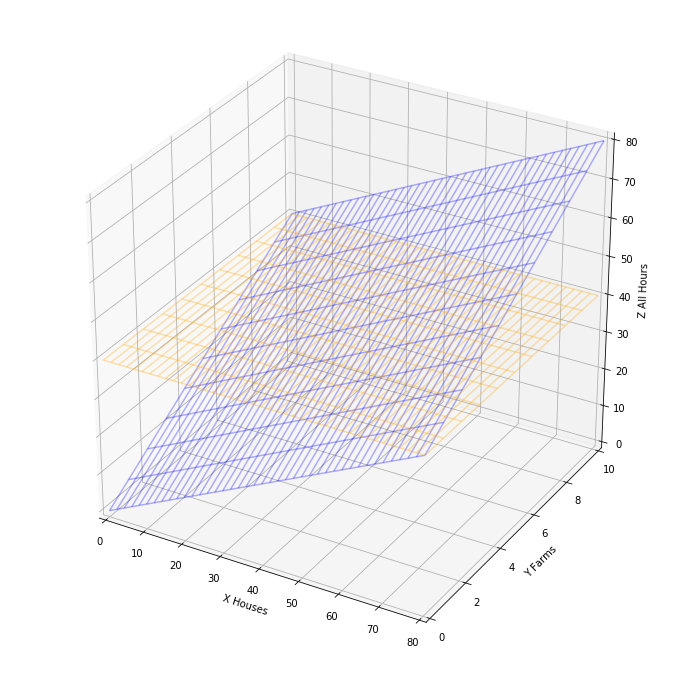

In [12]:
# plot 3D surface
#create figure
plt.figure(figsize=(12,12))

#set axes
ax = plt.axes(projection='3d')
ax.set_xlabel('X Houses')
ax.set_ylabel('Y Farms')
ax.set_zlabel('Z All Hours');

ax.set_xlim(0, 80); ax.set_ylim(0, 10); ax.set_zlim(0, 80);

#plot 3D Surfaces
ax.plot_wireframe(xx, yy, np.transpose(mx_hours_all), color='b', alpha = 0.3)
ax.plot_wireframe(xx, yy, np.transpose(mx_hours_limited), color='orange', alpha = 0.3)

The plot shows that multiple x + y combinations can produce total optimal 40 hours.

### 2.3 Add Inspeciton Prices to Maximize Revenue
to decide what option should work on and generate max revenue  
already incorporating limited resource constraint


In [13]:
#set prices
h_price = 500
f_price = 3000

price_vector = [h_price, f_price]

In [14]:
#compute (manually) total revenues for each possible option
mx_rev_all = np.zeros((dim_x+1, dim_y+1), dtype=int)

for i in x:
    for j in y:
        total_rev = i * h_price + j * f_price
        mx_rev_all[i,j] =  total_rev

#view matrix of total hours
print ('Defined z: all revenue combinations - including impossible more than 40 hours')

#preview data
#print('z: ',mx_rev_all[0:2])

print ('Max possible revenue with no limited work week: {}'.format(np.amax(mx_rev_all)))

Defined z: all revenue combinations - including impossible more than 40 hours
Max possible revenue with no limited work week: 70000


In [15]:
#prep z - scale revenues to hours in order to display on same scale (factor of 1000)
mx_rev_all_scaled = mx_rev_all / 1000


#### Graph 3D Surfaces

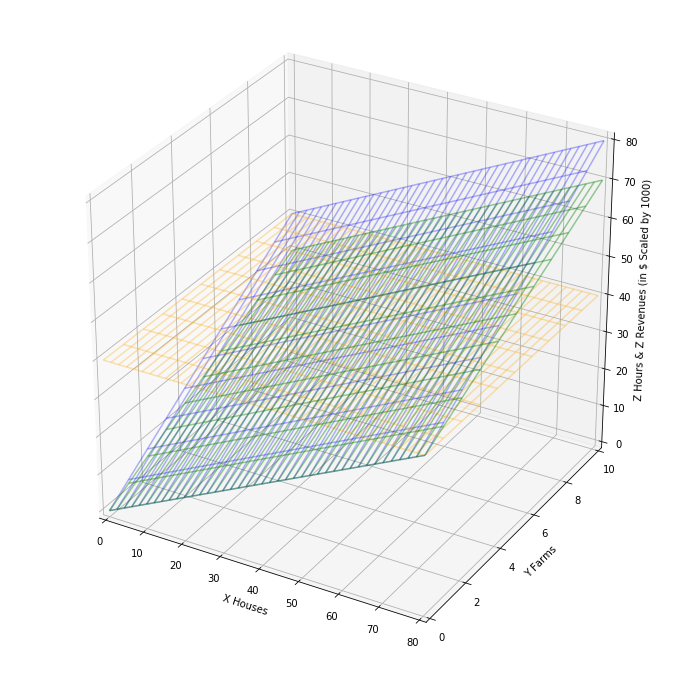

In [34]:
# plot 3D surface
#create figure
plt.figure(figsize=(12,12))

#set axes
ax = plt.axes(projection='3d')
ax.set_xlabel('X Houses')
ax.set_ylabel('Y Farms')
ax.set_zlabel('Z Hours & Z Revenues (in $ Scaled by 1000)');

ax.set_xlim(0, 80); ax.set_ylim(0, 10); ax.set_zlim(0, 80);

#plot 3D Surfaces
ax.plot_wireframe(xx, yy, np.transpose(mx_hours_all), color='b', alpha = 0.3)
ax.plot_wireframe(xx, yy, np.transpose(mx_hours_limited), color='orange', alpha = 0.3)
ax.plot_wireframe(xx, yy, np.transpose(mx_rev_all_scaled), color='g', alpha = 0.4)


The plot visually displays 3 surfaces:
- unlimited hours (in blue)
- limited hours (in orange), and
- unlimited revenues (in green)

To optimize revenue, with limited hours, choose x&y where all 3 lines meet (80 houses and 0 farms).  If somebody wants to work more than 40 hours a week, they can make more money by inspecting more houses and/or more farms.


### 2.4 Optimal Points in Possible Spaces
Graph all three surfaces and add optimal points for hours and revenues, given a limited work week.

#### Max Hours - with limited resource constraint
Check for optimal hours given a limited work week: 40 hrs/week

- Find all occurences of optimal # of hours

In [17]:
#refer https://docs.scipy.org/doc/numpy/reference/generated/numpy.argwhere.html
idx_hours_best = np.argwhere ( mx_hours_all == np.amax(N_HOURS_MAX))
idx_hours_best

array([[ 0, 10],
       [ 8,  9],
       [16,  8],
       [24,  7],
       [32,  6],
       [40,  5],
       [48,  4],
       [56,  3],
       [64,  2],
       [72,  1],
       [80,  0]])

Interpet the results:
x # of houses and y # of farms will result in max hours worked.

In [18]:
#ie. look at one value
mx_hours_all[8,9]

40.0

In [20]:
# Prep data for 3D scattered points
#print(idx_hours_best)
x_hours_best = idx_hours_best[:,0]
y_hours_best = idx_hours_best[:,1]
z_hours_best = []
for i,j in zip(x_hours_best,y_hours_best):
    z_hours_best.append(mx_hours_all[i,j])
    
z_hours_best

[40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0]

#### Max Revenue(s) - with limited resource constraint

Check for optimal revenues given a limited work week: 40 hrs/week  
- Looking at optimal hours combinations only, determine max revenue(s)  

In [21]:
rev_best_all = []
z_rev_best = 0
x_rev_best = None
y_rev_best = None

for i,j in zip(x_hours_best,y_hours_best):
    
    rev_best_all.append(mx_rev_all[i,j])
    
    if mx_rev_all[i,j] > z_rev_best:
        z_rev_best = mx_rev_all[i,j]
        x_rev_best = i
        y_rev_best = j

print ('Possible revenue(s) for optimal hours with limited work week: {}'.format(rev_best_all))

print ('Max possible revenue(s) with limited work week: {}'.format(z_rev_best))
print ('Max possible revenue happen with x houses = {} and y farms = {}'.format( x_rev_best, y_rev_best))

Possible revenue(s) for optimal hours with limited work week: [30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000]
Max possible revenue(s) with limited work week: 40000
Max possible revenue happen with x houses = 80 and y farms = 0


In [22]:
#prep z - scale revenues to hours in order to display on same scale (factor of 1000)
z_rev_best_scaled = z_rev_best / 1000

#### Graph 3D Surfaces and Optimal Points

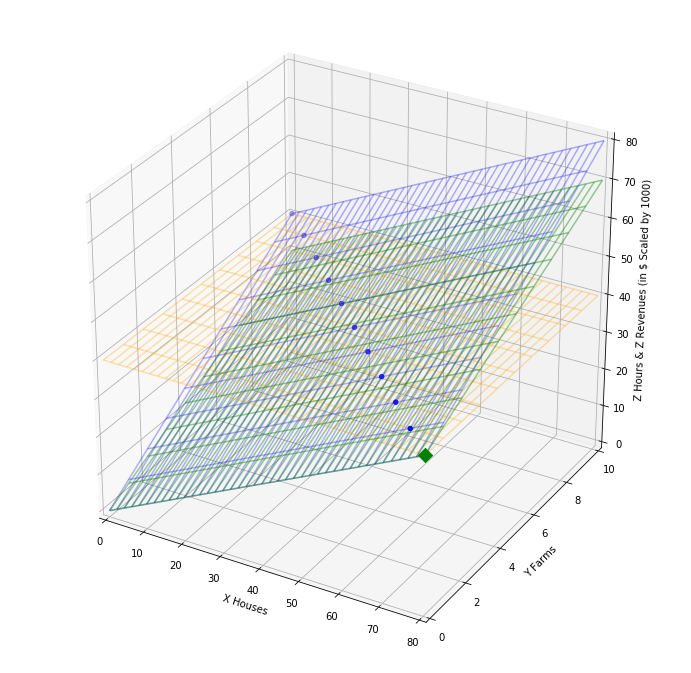

In [35]:
# plot 3D surface
#create figure
plt.figure(figsize=(12,12))

#set axes
ax = plt.axes(projection='3d')
ax.set_xlabel('X Houses')
ax.set_ylabel('Y Farms')
ax.set_zlabel('Z Hours & Z Revenues (in $ Scaled by 1000)');

ax.set_xlim(0, 80); ax.set_ylim(0, 10); ax.set_zlim(0, 80);

#plot 3D Surfaces
ax.plot_wireframe(xx, yy, np.transpose(mx_hours_all), color='b', alpha = 0.3)
ax.plot_wireframe(xx, yy, np.transpose(mx_hours_limited), color='orange', alpha = 0.3)
ax.plot_wireframe(xx, yy, np.transpose(mx_rev_all_scaled), color='g', alpha = 0.4)

# 3D optimal hours w/ limits
ax.scatter3D(x_hours_best, y_hours_best, z_hours_best, c='b', marker = 'o');
# 3D limited hours
rev_size = [100]
ax.scatter3D(x_rev_best, y_rev_best, z_rev_best_scaled, c='green', marker = 'D', s = rev_size);

The plot combines 3 spaces:
- unlimited hours (in blue)
- limited hours (in orange), and
- unlimited revenues (in green)

The plot also shows optimal intersection points:
- how multiple (x,y) combinations produce multiple optimal 40 hours
- one of those points is also a maximum revenue point

#### Conclusion
To optimize revenue with a limited work week, choose a combination of (x,y) where all 3 lines meet: 80 houses and 0 farms.  


Of course, if somebody wants to work more than 40 hours a week, they can make more money by inspecting more houses and/or more farms.



### Xtras

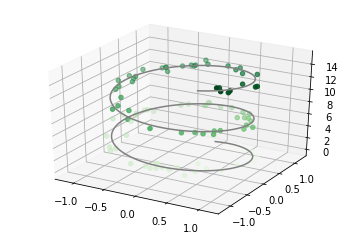

In [24]:
#$xtra
#refer https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

#### myGraph Surfaces
sufficient for my exercise

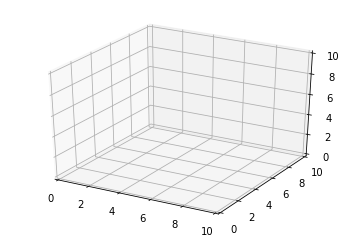

In [25]:
#started from
#src https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725

#create figure and axes
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.set_xlim(0, 10); ax.set_ylim(0, 10); ax.set_zlim(0, 10);


In [26]:
# Prep data for 3D surfaces
#define dim
dim = 4
x = np.linspace(0, dim, dim+1, dtype=int) #class numpy.ndarray, size 11
y = np.linspace(0, dim, dim+1, dtype=int)

xx, yy = np.meshgrid(x, y) #class numpy.ndarray size 11 x 11 = 121

print ('xx and yy look like this: \n', xx)

xx and yy look like this: 
 [[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [27]:
# Prep data for 3D surfaces - tiny data
# define z (manually)
mx_xy = np.zeros((dim+1, dim+1), dtype=int)

for i in x:
    for j in y:
        total = 1*i + 2*j
        mx_xy[i,j] =  total

#view matrix of total hours
print ('total combinations')
mx_xy
print(mx_xy)

total combinations
[[ 0  2  4  6  8]
 [ 1  3  5  7  9]
 [ 2  4  6  8 10]
 [ 3  5  7  9 11]
 [ 4  6  8 10 12]]


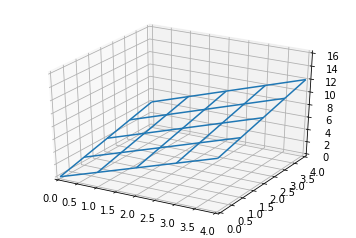

In [28]:
# plot the surface
#create figure
fig = plt.figure()

# Add an axes
ax = plt.axes(projection='3d')
ax.set_xlim(0, dim); ax.set_ylim(0, dim); ax.set_zlim(0, dim * dim);

ax.plot_wireframe(xx, yy, mx_xy)
#ax.plot_surface(xx, yy, z, alpha=0.2)

In [29]:
# Prep data for 3D surfaces - realistic data

#define x&y based on dimensions
dim_x = int(h_max)
dim_y = int(f_max)
x = np.linspace(0, h_max, dim_x+1, dtype=int) #class numpy.ndarray, size 81
y = np.linspace(0, f_max, dim_y+1, dtype=int) #class numpy.ndarray, size 11

xx, yy = np.meshgrid(x, y) #class numpy.ndarray size 81 x 11 = 891

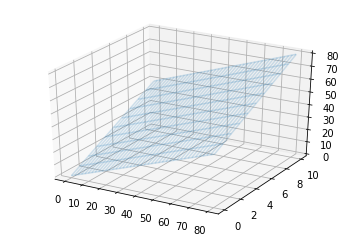

In [30]:
# plot the surface 
# error ValueError: shape mismatch: objects cannot be broadcast to a single shape
# refer https://stackoverflow.com/questions/36668771/axes3d-numpy-arrays-error-while-trying-to-build-3d-plot

#create figure
fig = plt.figure()

# Add an axes
ax = plt.axes(projection='3d')

ax.plot_wireframe(xx, yy, np.transpose(mx_hours_all), alpha = 0.2)

#### Example - 3D plotting with Matplotlib

#### 3D Surface Plots
src https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725

step 1. Generate the actual points that will make up the surface plot.

In [31]:
def z_function(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

step 2. Plot wireframe - estimate of surface

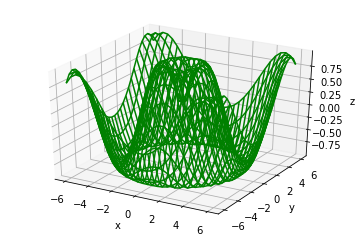

In [32]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z, color='green')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

Step 3. Project our surface onto our wire-frame estimate and extrapolate all of the points.

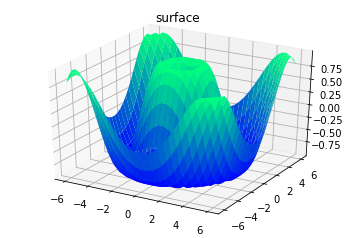

In [33]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='winter', edgecolor='none')
ax.set_title('surface');